# Galton Board Simulation

Christiaan van Roon, 11122854

Sander Hansen, 10995080

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this exercise we will simulate a Galton board. The basic random
experiment in a Galton board is a small spherical ball vertically
falling and hitting a small pin. The ball is restricted to move in two
dimensional plane and thus is forced to go to the left or right of the
pin. Probability of going left is $P(L)$ and that of going right is
$P(R)=1-P(L)$. 

Then just below the first pin when the ball falls to the left, is
another pin. Then the ball is again forced to go left or right. The
same is done for the ball hitting the top most pin and goes right.

Note that a ball first going left and then right ends up in the same
position as ball first going right and then going left.

Along the same line of reasoning we can add more layers of pins to
obtain a Galton board of $n$ layers. The path a marble takes when
falling down and going left or right $n$ times is characterized as a
string of length $n$ of only L's and R's (encode these with 0 and 1 
respectively).

The position where the ball ends up is given by the number of 'R's in
the string (when we number the bins from left to right with numbers 0 to $n$.

In [2]:
def galtonSimulate(n_layers, n_balls, p_left=0.5):
    """
    Simulate a Galton Board
    n_layers: number of layers in Galton Board
    n_balls: total number of balls dropped
    p_left: the probability the ball goes left hitting a pin
    return:
    A: array of shape (n_layers+1,) with A[i] the number
    of balls that fall into bin i
    """
    # Determine path and calculate bin number
    determ = np.random.randint(2, size=(n_balls, n_layers))
    bin_number = np.sum(determ, axis=1)
    A = np.bincount(bin_number)
    
    return A

In [3]:
n_layers = 10
n_balls = 10000

A = galtonSimulate(n_layers,n_balls)

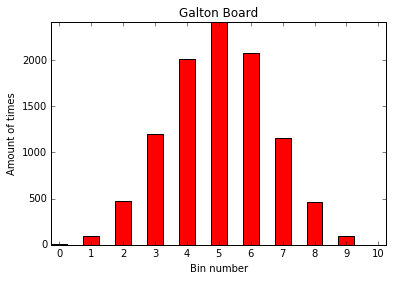

In [4]:
# Show graph
index = np.arange(n_layers + 1)

fig, ax = plt.subplots()
bar = ax.bar(index - 0.25, A, 0.5, color='r')
plt.axis([-0.25, n_layers + 0.25, 0, amax(A)])
plt.xticks(np.arange(n_layers + 1))

ax.set_ylabel('Amount of times')
ax.set_xlabel('Bin number')
ax.set_title('Galton Board')
plt.show()

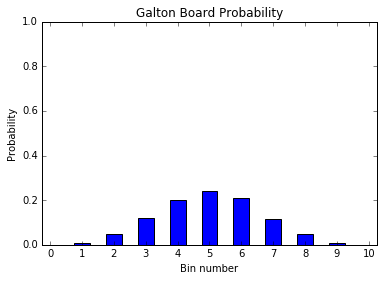

In [5]:
# scaled version
probability = A / float(n_balls)

index = np.arange(n_layers + 1)

fig, ax = plt.subplots()
bar = ax.bar(index - 0.25, probability, 0.5, color='b')
plt.axis([-0.25, n_layers + 0.25, 0, 1])
plt.xticks(np.arange(n_layers + 1))
ax.set_ylabel('Probability')
ax.set_xlabel('Bin number')
ax.set_title('Galton Board Probability')
plt.show()